In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

## Data Collection and Processing

In [3]:
# loading the csv data to a Pandas DataFrame
heart_disease_data = pd.read_csv('heart_disease_data.csv')

In [4]:
# print the first 5 row of the heart disease data
heart_disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#print the last 5 row of the heart disease data
heart_disease_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


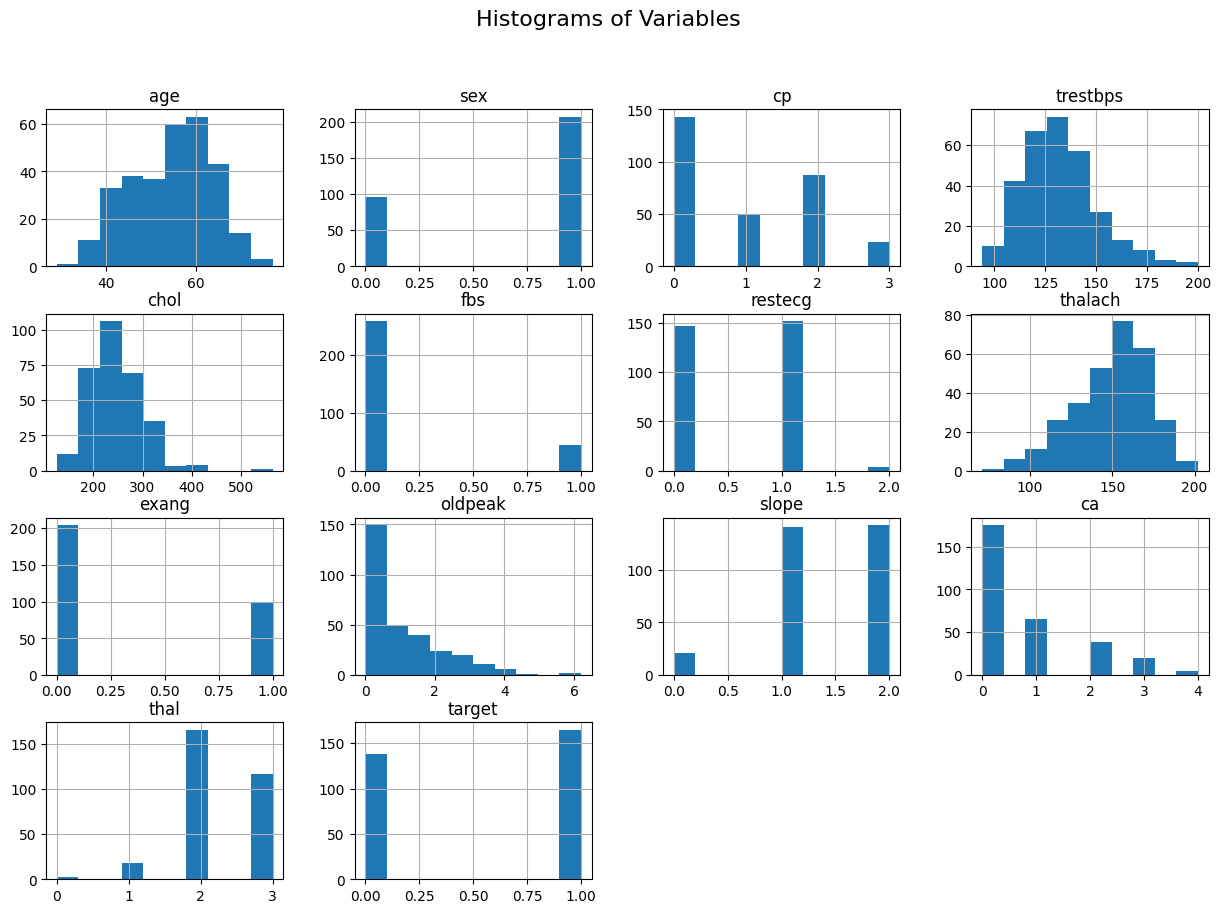

In [7]:
# Visualizing histograms
heart_disease_data.hist(figsize=(15, 10))
plt.suptitle("Histograms of Variables", fontsize=16)
plt.show()

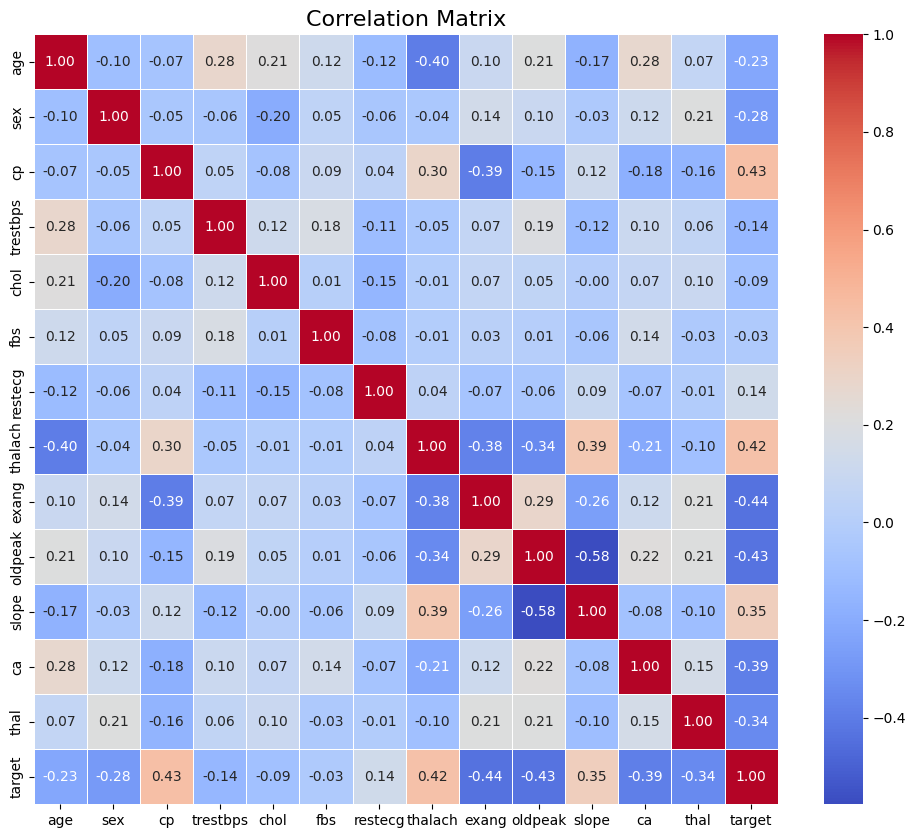

In [8]:
# Visualizing correlation matrix
correlation_matrix = heart_disease_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [53]:
#number of rows and columns in the dataset
heart_disease_data.shape

(303, 14)

In [54]:
# getting some information about the data
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [55]:
# Checking for missing values
heart_disease_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [56]:
# Get statistical measures of the data
heart_disease_data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [57]:
# Checking the distribution of target variable
heart_disease_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1 ---> Defective Heart

0 ---> Healthy Heart

### Splitting the Features and Target

In [58]:
x = heart_disease_data.drop(columns='target', axis=1)
y = heart_disease_data['target']

In [59]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [60]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### splitting the data into training and test data

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=2)

In [62]:
print(x.shape, x_train.shape, x_test.shape)

(303, 13) (242, 13) (61, 13)


## Model Training using Logistic Regression

Applying the scaler.transform() method on the train data and test data, to ensure that both the training and test data are scaled consistently, and the model can make accurate predictions on the test set.

In [65]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

In [66]:
model = LogisticRegression()

In [67]:
# training the LogisticRegression model with Training data
model.fit(x_train_scaled, y_train)

LogisticRegression()

### Model Evaluation

### accuracy on the training data

In [70]:
x_train_pred = model.predict(x_train_scaled)

training_data_accuracy = accuracy_score(x_train_pred, y_train)

In [71]:
print('Accuracy on Training data: ', training_data_accuracy)

Accuracy on Training data:  0.8471074380165289


In [73]:
#scale the test data

x_test_scaled = scaler.fit_transform(x_test)

# Accuracy score of test data
x_test_pred = model.predict(x_test_scaled)

test_data_accuracy = accuracy_score(x_test_pred, y_test)

In [74]:
print('Accuracy on Test data: ', test_data_accuracy)

Accuracy on Test data:  0.8032786885245902


### Building a predictive system

In [95]:
input_data = (62,0,0,160,164,0,0,145,0,6.2,0,3,3)

# change the input data to a numpy array
input_data_as_numpy_array = np.array(input_data)

input_data_as_numpy_array

array([ 62. ,   0. ,   0. , 160. , 164. ,   0. ,   0. , 145. ,   0. ,
         6.2,   0. ,   3. ,   3. ])

In [96]:
# reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

input_data_reshaped

array([[ 62. ,   0. ,   0. , 160. , 164. ,   0. ,   0. , 145. ,   0. ,
          6.2,   0. ,   3. ,   3. ]])

In [97]:
prediction = model.predict(input_data_reshaped)

prediction

if (prediction[0] == 0):
    print('The person does not have a heart Diseases')
else:
    print('The Person has Heart Disease')

The person does not have a heart Diseases
